# Display objects

A `striplog` depends on a hierarchy of objects. This notebook shows the objects related to display:

- [Decor](#Decor): One element from a legend — describes how to display a Rock.
- [Legend](#Legend): A set of Decors — describes how to display a set of Rocks or a Striplog.

<hr />

## Decor

In [1]:
from striplog import Decor

A Decor attaches a display style to a Rock. 

In [2]:
print(Decor.__doc__)


    A single display style. A Decor describes how to display a given set
    of Component properties.

    In general, you will not usually use a Decor on its own. Instead, you
    will want to use a Legend, which is just a list of Decors, and leave
    the Decors to the Legend.

    Args:
      params (dict): The parameters you want in the Decor. There must be a
        Component to attach the decoration to, and at least 1 other attribute.
        It's completely up to you, but you probably want at least a colour
        (hex names like #AAA or #d3d3d3, or matplotlib's English-language
        names listed at http://ageo.co/modelrcolour are acceptable.

        The only other parameter the class recognizes for now is 'width',
        which is the width of the striplog element.

    Example:
      my_rock = Component({ ... })
      d = {'component': my_rock, 'colour': 'red'}
      my_decor = Decor(d)
    


We are going to need a `Component` to make a `Decor`.

In [3]:
from striplog import Component
r = {'colour': 'grey',
     'grainsize': 'vf-f',
     'lithology': 'sand',
     'porosity': 0.123
    }
rock = Component(r)
rock

porosity,0.123
lithology,sand
colour,grey
grainsize,vf-f


Like `Rock`s, we instantiate `Decor`s with a `dict` of properties:

In [4]:
d = {'color': '#267022',
     'component': rock,
     'width': 3}
decor = Decor(d)
decor

Decor({'component': Component({'porosity': 0.123, 'lithology': 'sand', 'colour': 'grey', 'grainsize': 'vf-f'}), 'colour': '#267022', 'width': 3.0, 'hatch': None})

Or instantiate with keyword parameters:

In [5]:
Decor(colour='#86f0b6', component=Component({'colour': 'grey', 'grainsize': 'vf-f', 'porosity': 0.123, 'lithology': 'sand'}), width=3.0)

Decor({'component': Component({'porosity': 0.123, 'lithology': 'sand', 'colour': 'grey', 'grainsize': 'vf-f'}), 'colour': '#86f0b6', 'width': 3.0, 'hatch': None})

You can access its attributes. It has two ways to understand colour:

In [6]:
print("Hex: {}... and RGB: {}".format(decor.colour, decor.rgb))

Hex: #267022... and RGB: (38, 112, 34)


In [7]:
print(decor)

Decor({'component': Component({'porosity': 0.123, 'lithology': 'sand', 'colour': 'grey', 'grainsize': 'vf-f'}), 'colour': '#267022', 'width': 3.0, 'hatch': None})


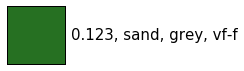

In [8]:
%matplotlib inline
decor.plot()

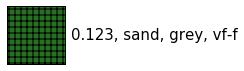

In [29]:
decor.hatch = '++'
decor.plot()

<hr />

## Legend

In [9]:
from striplog import Legend
print(Legend.__doc__)


    A look-up table to assist in the conversion of Components to
    a plot colour.

    Args:
        list_of_Decors (list): The decors to collect into a legend. In
            general, you will want to leave legend building to the constructor
            class methods, `Legend.default()`, and `Legend.from_csv(string)`.
            We can add others over time, such as `from_xls` and so on.
    


We'll define a legend in a CSV file. I can't think of a better way for now. It would be easy to make a web form to facilitate this with, for example, a colour picker. It may not be worth it, though; I imagine one would create one and then leave it alone most of the time. 

In [10]:
l = u"""colour, width, component lithology, component colour, component grainsize
#F7E9A6, 3, Sandstone, Grey, VF-F
#FF99CC, 2, Anhydrite, , 
#DBD6BC, 3, Heterolithic, Grey, 
#FF4C4A, 2, Volcanic, , 
#86F0B6, 5, Conglomerate, , 
#FF96F6, 2, Halite, , 
#F2FF42, 4, Sandstone, Grey, F-M
#DBC9BC, 3, Heterolithic, Red, 
#A68374, 2, Siltstone, Grey, 
#A657FA, 3, Dolomite, , 
#FFD073, 4, Sandstone, Red, C-M
#A6D1FF, 3, Limestone, , 
#FFDBBA, 3, Sandstone, Red, VF-F
#FFE040, 4, Sandstone, Grey, C-M
#A1655A, 2, Siltstone, Red, 
#363434, 1, Coal, , 
#664A4A, 1, Mudstone, Red, 
#666666, 1, Mudstone, Grey, """

In [11]:
legend = Legend.from_csv(l)
legend[:5]

Legend(Decor({'component': Component({'lithology': 'sandstone', 'colour': 'grey', 'grainsize': 'vf-f'}), 'colour': '#f7e9a6', 'width': 3.0, 'hatch': None})
Decor({'component': Component({'lithology': 'anhydrite'}), 'colour': '#ff99cc', 'width': 2.0, 'hatch': None})
Decor({'component': Component({'lithology': 'heterolithic', 'colour': 'grey'}), 'colour': '#dbd6bc', 'width': 3.0, 'hatch': None})
Decor({'component': Component({'lithology': 'volcanic'}), 'colour': '#ff4c4a', 'width': 2.0, 'hatch': None})
Decor({'component': Component({'lithology': 'conglomerate'}), 'colour': '#86f0b6', 'width': 5.0, 'hatch': None}))

Duplicate lithologies will result in a warning. To avoid strange results, you should fix the problem by removing duplicates.

In [12]:
l = u"""colour, component lithology
#F7E9A6, Sandstone
#F2FF42, Sandstone
#FF99CC, Anhydrite
#DBD6BC, Heterolithic 
#FF4C4A, Volcanic
#86F0B6, Conglomerate
#FFD073, Sandstone
"""

In [13]:
Legend.from_csv(l)

/Users/matt/anaconda/envs/python3/lib/python3.4/site-packages/striplog/legend.py:482: UserWarning: This legend contains duplicate components.
  warnings.warn(w)
/Users/matt/anaconda/envs/python3/lib/python3.4/site-packages/striplog/legend.py:482: UserWarning: This legend contains duplicate components.
  warnings.warn(w)


Legend(Decor({'component': Component({'lithology': 'sandstone'}), 'colour': '#f7e9a6', 'width': None, 'hatch': None})
Decor({'component': Component({'lithology': 'sandstone'}), 'colour': '#f2ff42', 'width': None, 'hatch': None})
Decor({'component': Component({'lithology': 'anhydrite'}), 'colour': '#ff99cc', 'width': None, 'hatch': None})
Decor({'component': Component({'lithology': 'heterolithic '}), 'colour': '#dbd6bc', 'width': None, 'hatch': None})
Decor({'component': Component({'lithology': 'volcanic'}), 'colour': '#ff4c4a', 'width': None, 'hatch': None})
Decor({'component': Component({'lithology': 'conglomerate'}), 'colour': '#86f0b6', 'width': None, 'hatch': None})
Decor({'component': Component({'lithology': 'sandstone'}), 'colour': '#ffd073', 'width': None, 'hatch': None}))

We can also export a legend as CSV text:

In [14]:
print(legend.to_csv())

colour,width,hatch,component lithology,component colour,component grainsize
#f7e9a6,3.0,None,sandstone,grey,vf-f,
#ff99cc,2.0,None,anhydrite,,,
#dbd6bc,3.0,None,heterolithic,grey,,
#ff4c4a,2.0,None,volcanic,,,
#86f0b6,5.0,None,conglomerate,,,
#ff96f6,2.0,None,halite,,,
#f2ff42,4.0,None,sandstone,grey,f-m,
#dbc9bc,3.0,None,heterolithic,red,,
#a68374,2.0,None,siltstone,grey,,
#a657fa,3.0,None,dolomite,,,
#ffd073,4.0,None,sandstone,red,c-m,
#a6d1ff,3.0,None,limestone,,,
#ffdbba,3.0,None,sandstone,red,vf-f,
#ffe040,4.0,None,sandstone,grey,c-m,
#a1655a,2.0,None,siltstone,red,,
#363434,1.0,None,coal,,,
#664a4a,1.0,None,mudstone,red,,
#666666,1.0,None,mudstone,grey,,



## Builtin legends

There are several: 

    'nsdoe': Nova Scotia Dept. of Energy
    'nagmdm__6_2': USGS N. Am. Geol. Map Data Model 6.2 <<< default
    'nagmdm__6_1': USGS N. Am. Geol. Map Data Model 6.1
    'nagmdm__4_3': USGS N. Am. Geol. Map Data Model 4.3
    'sgmc': USGS State Geologic Map Compilation

In [15]:
legend = Legend.builtin('nsdoe')
legend

Legend(Decor({'component': Component({'lithology': 'sandstone', 'colour': 'grey', 'grainsize': 'vf-f'}), 'colour': '#f7e9a6', 'width': 3.0, 'hatch': None})
Decor({'component': Component({'lithology': 'anhydrite'}), 'colour': '#ff99cc', 'width': 2.0, 'hatch': None})
Decor({'component': Component({'lithology': 'heterolithic', 'colour': 'grey'}), 'colour': '#dbd6bc', 'width': 3.0, 'hatch': None})
Decor({'component': Component({'lithology': 'volcanic'}), 'colour': '#ff4c4a', 'width': 2.0, 'hatch': None})
Decor({'component': Component({'lithology': 'conglomerate'}), 'colour': '#86f0b6', 'width': 5.0, 'hatch': None})
Decor({'component': Component({'lithology': 'halite'}), 'colour': '#ff96f6', 'width': 2.0, 'hatch': None})
Decor({'component': Component({'lithology': 'sandstone', 'colour': 'grey', 'grainsize': 'f-m'}), 'colour': '#f2ff42', 'width': 4.0, 'hatch': None})
Decor({'component': Component({'lithology': 'heterolithic', 'colour': 'red'}), 'colour': '#dbc9bc', 'width': 3.0, 'hatch': Non

There is also a default legend, which you can call with `Legend.default()` (no arguments).

In [16]:
Legend.default()

Legend(Decor({'component': Component({'lithology': 'unconsolidated material'}), 'colour': '#fdf43f', 'width': None, 'hatch': None})
Decor({'component': Component({'lithology': 'alluvium'}), 'colour': '#ffff89', 'width': None, 'hatch': None})
Decor({'component': Component({'lithology': 'flood plain'}), 'colour': '#ffffd5', 'width': None, 'hatch': None})
Decor({'component': Component({'lithology': 'levee'}), 'colour': '#fffae9', 'width': None, 'hatch': None})
Decor({'component': Component({'lithology': 'delta'}), 'colour': '#fffac8', 'width': None, 'hatch': None})
Decor({'component': Component({'lithology': 'alluvial fan'}), 'colour': '#ffffb7', 'width': None, 'hatch': None})
Decor({'component': Component({'lithology': 'alluvial terrace'}), 'colour': '#faee7a', 'width': None, 'hatch': None})
Decor({'component': Component({'lithology': 'lake or marine sediment'}), 'colour': '#f4efe4', 'width': None, 'hatch': None})
Decor({'component': Component({'lithology': 'playa'}), 'colour': '#f1e5df'

There are also default timescales:

In [17]:
time = Legend.default_timescale()
time[:10]

Legend(Decor({'component': Component({'age': 'phanerozoic'}), 'colour': '#6fdaed', 'width': None, 'hatch': None})
Decor({'component': Component({'age': 'cenozoic'}), 'colour': '#f6ec39', 'width': None, 'hatch': None})
Decor({'component': Component({'age': 'quaternary'}), 'colour': '#fef691', 'width': None, 'hatch': None})
Decor({'component': Component({'age': 'tertiary'}), 'colour': '#f2f902', 'width': None, 'hatch': None})
Decor({'component': Component({'age': 'neogene'}), 'colour': '#fedd2d', 'width': None, 'hatch': None})
Decor({'component': Component({'age': 'holocene'}), 'colour': '#fef1e0', 'width': None, 'hatch': None})
Decor({'component': Component({'age': 'pleistocene'}), 'colour': '#feefb8', 'width': None, 'hatch': None})
Decor({'component': Component({'age': 'upper pleistocene'}), 'colour': '#fef1d6', 'width': None, 'hatch': None})
Decor({'component': Component({'age': 'tarantian'}), 'colour': '#fef1d6', 'width': None, 'hatch': None})
Decor({'component': Component({'age': 'm

## Querying a legend

The legend is basically a query table. We can ask the Legend what colour to use for a given Rock object:

In [18]:
legend.get_colour(rock)

'#eeeeee'

In [19]:
rock3 = Component({'colour': 'red',
           'grainsize': 'vf-f',
           'lithology': 'sandstone'})
legend.get_colour(rock3)

'#ffdbba'

Sometimes we also want to use a width for a given lithology:

In [20]:
legend.get_width(rock3)

3.0

We can also ask the legend which Rock is represented by a particular colour. (I doubt you'd ever really need to do this, but I had to implement this to allow you to make a `Striplog` from an image: it looks up the rocks to use by colour.)

In [21]:
legend.get_component('#f7e9a6')

lithology,sandstone
colour,grey
grainsize,vf-f


The `Legend` behaves more or less like a list, so we can index into it:

In [22]:
legend[3:5]

Legend(Decor({'component': Component({'lithology': 'volcanic'}), 'colour': '#ff4c4a', 'width': 2.0, 'hatch': None})
Decor({'component': Component({'lithology': 'conglomerate'}), 'colour': '#86f0b6', 'width': 5.0, 'hatch': None}))

`Legend`s can plot themselves. 

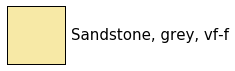

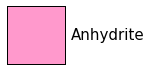

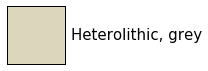

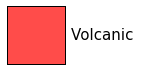

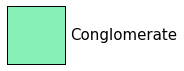

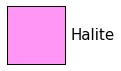

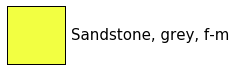

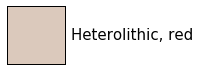

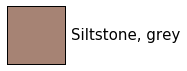

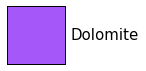

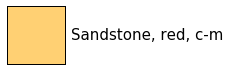

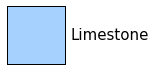

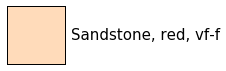

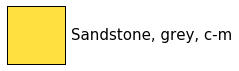

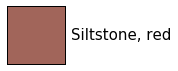

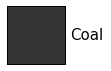

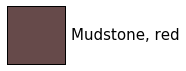

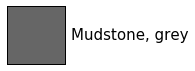

In [23]:
legend.plot()

Sometimes you don't want to have to make a legend, so you can use a random one. Just pass a list of `Component`s...

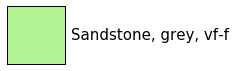

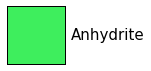

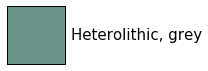

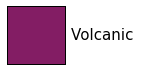

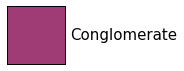

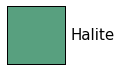

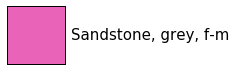

In [24]:
# We'll scrape a quick list of 7 components from the default legend:
c = [d.component for d in legend[:7]]

l = Legend.random(c)
l.plot()

There is a default colour table for geological timescales too... it's based on the Wikipedia's colour scheme for the geological timetable. 

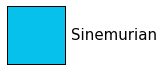

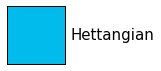

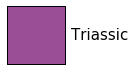

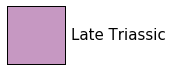

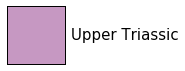

In [25]:
time[74:79].plot(fmt="{age!t}")  # Pass a format for proper case

## Hatch patterns

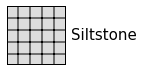

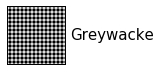

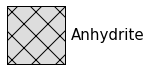

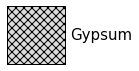

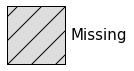

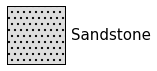

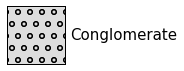

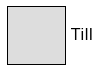

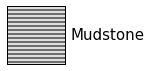

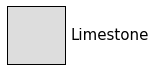

In [31]:
hatchy = """colour,width,hatch,component colour,component grainsize,component lithology
#dddddd,1,+,,,siltstone,
#dddddd,1,+++,,,greywacke,
#dddddd,2,x,,,anhydrite,
#dddddd,2,xxx,,,gypsum,
#dddddd,3,/,,,missing,
#dddddd,4,..,,,sandstone,
#dddddd,5,o,,,conglomerate,
#dddddd,5,0,,,till,
#dddddd,6,---,,,mudstone,
#dddddd,7,,,,limestone,
"""
Legend.from_csv(hatchy).plot()

<hr />

<p style="color:gray">©2015 Agile Geoscience. Licensed CC-BY. <a href="https://github.com/agile-geoscience/striplog">striplog.py</a></p>